Reference Paper: [A Neural Probabilistic Language Model - Bengio et.al.](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

<br>

## Graphic of an MLP:
![MLP](https://i.postimg.cc/4d03m46Q/Screenshot-2025-06-09-022351.png)

In [2]:
import torch

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/AndrejKarpathy_NN_Hero/names.txt'

words = open(path, 'r').read().splitlines()

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [5]:
block_size = 3 # no of characters to predict the next one
X, Y = [], []

for w in words[:5]:
    print(w)

    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), " ------> ", ch)
        context= context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
...  ------>  e
..e  ------>  m
.em  ------>  m
emm  ------>  a
mma  ------>  .
olivia
...  ------>  o
..o  ------>  l
.ol  ------>  i
oli  ------>  v
liv  ------>  i
ivi  ------>  a
via  ------>  .
ava
...  ------>  a
..a  ------>  v
.av  ------>  a
ava  ------>  .
isabella
...  ------>  i
..i  ------>  s
.is  ------>  a
isa  ------>  b
sab  ------>  e
abe  ------>  l
bel  ------>  l
ell  ------>  a
lla  ------>  .
sophia
...  ------>  s
..s  ------>  o
.so  ------>  p
sop  ------>  h
oph  ------>  i
phi  ------>  a
hia  ------>  .


In [9]:
# Create an embedding layer (depends on us)
C = torch.randn((27, 2)) # Lookup Matrix with 27 Weights an 2 Layers
emb = C[X] # As learn in previous exercise, it's same as X@C
emb.shape

torch.Size([32, 3, 2])

In [19]:
X[0], C[0], emb[0]

(tensor([0, 0, 0]),
 tensor([-0.9795,  1.0075]),
 tensor([[-0.9795,  1.0075],
         [-0.9795,  1.0075],
         [-0.9795,  1.0075]]))

In [21]:
# Now we can multiply with our next layer
# For 32 Examples, we have 3 index in each, and 2 layers
    # Have to get that 32 * 3 * 2 => 32 * 6 shape
# We can concat the last 2 dimensions into 1 single dimension

# emb[:, 0, :] # this gives us 1st column, similarly 2 more columns.

torch.cat([emb[ :, 0, :], emb[:, 1, :] , emb[:, 2, :]], dim=1).shape

torch.Size([32, 6])

In [30]:
# torch.unbind(emb, 1) # this achieves the same as drilling into 1st dimension [:, i, :]

unb = torch.cat(torch.unbind(emb, 1), 1)
unb.shape

torch.Size([32, 6])

In [34]:
emb[0].view(6) # we can replace the arg by -1 when we dont know the number

tensor([-0.9795,  1.0075, -0.9795,  1.0075, -0.9795,  1.0075])

In [37]:
unb2 = emb.view(32, -1) # this will give us 32, multiply whatever dimensions are left (3*2) into the next dimension
unb2

tensor([[-0.9795,  1.0075, -0.9795,  1.0075, -0.9795,  1.0075],
        [-0.9795,  1.0075, -0.9795,  1.0075,  0.4978, -0.7835],
        [-0.9795,  1.0075,  0.4978, -0.7835, -1.2198,  0.9824],
        [ 0.4978, -0.7835, -1.2198,  0.9824, -1.2198,  0.9824],
        [-1.2198,  0.9824, -1.2198,  0.9824,  1.2706,  0.7349],
        [-0.9795,  1.0075, -0.9795,  1.0075, -0.9795,  1.0075],
        [-0.9795,  1.0075, -0.9795,  1.0075, -0.2962, -1.0084],
        [-0.9795,  1.0075, -0.2962, -1.0084,  1.0889,  1.6599],
        [-0.2962, -1.0084,  1.0889,  1.6599, -0.2205, -1.0814],
        [ 1.0889,  1.6599, -0.2205, -1.0814,  1.1028, -1.9828],
        [-0.2205, -1.0814,  1.1028, -1.9828, -0.2205, -1.0814],
        [ 1.1028, -1.9828, -0.2205, -1.0814,  1.2706,  0.7349],
        [-0.9795,  1.0075, -0.9795,  1.0075, -0.9795,  1.0075],
        [-0.9795,  1.0075, -0.9795,  1.0075,  1.2706,  0.7349],
        [-0.9795,  1.0075,  1.2706,  0.7349,  1.1028, -1.9828],
        [ 1.2706,  0.7349,  1.1028, -1.9

In [38]:
unb3 = emb.view(-1, 6)
unb3

tensor([[-0.9795,  1.0075, -0.9795,  1.0075, -0.9795,  1.0075],
        [-0.9795,  1.0075, -0.9795,  1.0075,  0.4978, -0.7835],
        [-0.9795,  1.0075,  0.4978, -0.7835, -1.2198,  0.9824],
        [ 0.4978, -0.7835, -1.2198,  0.9824, -1.2198,  0.9824],
        [-1.2198,  0.9824, -1.2198,  0.9824,  1.2706,  0.7349],
        [-0.9795,  1.0075, -0.9795,  1.0075, -0.9795,  1.0075],
        [-0.9795,  1.0075, -0.9795,  1.0075, -0.2962, -1.0084],
        [-0.9795,  1.0075, -0.2962, -1.0084,  1.0889,  1.6599],
        [-0.2962, -1.0084,  1.0889,  1.6599, -0.2205, -1.0814],
        [ 1.0889,  1.6599, -0.2205, -1.0814,  1.1028, -1.9828],
        [-0.2205, -1.0814,  1.1028, -1.9828, -0.2205, -1.0814],
        [ 1.1028, -1.9828, -0.2205, -1.0814,  1.2706,  0.7349],
        [-0.9795,  1.0075, -0.9795,  1.0075, -0.9795,  1.0075],
        [-0.9795,  1.0075, -0.9795,  1.0075,  1.2706,  0.7349],
        [-0.9795,  1.0075,  1.2706,  0.7349,  1.1028, -1.9828],
        [ 1.2706,  0.7349,  1.1028, -1.9

In [39]:
# Let's use .view as it's the most efficient

In [41]:
# 2nd Layer with 100 Neurons

w1 = torch.randn(6, 100)
b1 = torch.randn(100)

In [42]:
h = torch.tanh(emb.view(-1, 6) @ w1 + b1)

In [44]:
h.shape

torch.Size([32, 100])

In [46]:
h

tensor([[ 0.9812,  0.8002, -0.9867,  ..., -0.9683, -0.9956,  0.6567],
        [-0.6342, -0.8895, -0.8123,  ..., -0.9969, -0.7499, -0.5278],
        [ 0.5557,  0.6569, -0.9898,  ..., -0.9202, -0.9930,  0.9574],
        ...,
        [ 0.7506, -0.9901,  0.9174,  ..., -0.0026,  0.2115, -0.9510],
        [-0.9956,  0.2821, -0.9676,  ..., -0.9619, -0.8717,  0.7159],
        [-0.3010, -0.9999,  0.9820,  ..., -0.6499,  0.5470, -0.8605]])

In [47]:
# Final Layer
w2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [48]:
logits = h @ w2 + b2
logits.shape

torch.Size([32, 27])

In [49]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs.shape

torch.Size([32, 27])

In [50]:
probs[0]

tensor([3.5492e-05, 4.5299e-05, 1.6494e-01, 2.8948e-10, 8.2483e-01, 8.7969e-11,
        5.2079e-11, 2.0505e-03, 9.5199e-05, 2.0868e-11, 1.1648e-05, 1.5561e-06,
        2.4305e-08, 1.2082e-03, 1.9975e-08, 4.5817e-15, 1.7619e-09, 2.6627e-03,
        1.1615e-05, 1.5985e-05, 7.5409e-10, 2.7947e-04, 2.0669e-06, 3.5843e-03,
        2.1932e-04, 9.1112e-09, 2.8289e-06])

In [51]:
probs[0].sum()

tensor(1.0000)

In [52]:
loss = -probs[torch.arange(Y.nelement()), Y].log().mean()

In [53]:
import torch.nn.functional as F

loss2 = F.cross_entropy(h @ w2 + b2, Y)

In [54]:
loss, loss2

(tensor(17.5548), tensor(17.5548))

In [63]:
# CLEAN CODE

In [77]:
block_size = 3 # no of characters to predict the next one
X, Y = [], []

for w in words:
    # print(w)

    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), " ------> ", ch)
        context= context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [78]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [103]:
# Initializing the parameters
g = torch.Generator().manual_seed(2147483647)
nh = 2 # number of Neurons in the first layer # lookup layer

C = torch.randn((27, nh), generator=g, requires_grad=True) # [27, 2]
w1 = torch.randn(( nh*block_size , 100), generator=g, requires_grad=True) # [27, 6]
b1 = torch.randn((100), generator=g, requires_grad=True)
w2 = torch.randn((100, 27), generator=g, requires_grad=True)
b2 = torch.randn((27), generator=g, requires_grad=True)

params = [C, w1, b1, w2, b2]

In [104]:
sum(p.nelement() for p in params) # number of parameters in total

3481

In [105]:
# Setting Dynamic learning rate
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre # from 0.001 to 1 exponentially

In [106]:
# Making it learn
# for _ in range(10):
#     # Forward Pass
#     emb = C[X] # First Layer: [228146, 3, 2]
#     h = torch.tanh(emb.view(-1, 6) @ w1 + b1) # 2nd Layer: [228146, 6] @ [6, 100] = [228146, 100]
#     logits = h @ w2 + b2 # 3rd Layer: [228146, 100] @ [100, 27] = [228146, 27]
#     loss = F.cross_entropy(logits, Y) # Calculating loss
#     print(loss.item())

#     # Backward Pass
#     for p in params:
#         p.grad = None
#     loss.backward()
#     for p in params:
#         p.data += -0.1 * p.grad

In [107]:
# We see that each iteration is taking a lot of time
# So, instead of adjusting all params, we can randomly choose some of them
# it's called batching

In [108]:
# Making it learn
lri = []
lossi = []

for i in range(1000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32, )) # staring num, end num, number of ints
    # we are randomly choosing 32 indexes to look into and optimize

    # Forward Pass
    emb = C[X[ix]] # First Layer: [32, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ w1 + b1) # 2nd Layer: [32, 6] @ [6, 100] = [32, 100]
    logits = h @ w2 + b2 # 3rd Layer: [32, 100] @ [100, 27] = [32, 27]
    loss = F.cross_entropy(logits, Y[ix]) # Calculating loss

    # Backward Pass
    for p in params:
        p.grad = None
    loss.backward()

    # nudging
    lr = lrs[i]
    for p in params:
        p.data += -lr * p.grad

    # track stats
    lri.append(lre[i])
    lossi.append(loss.item())

print(loss.item())

7.708298683166504


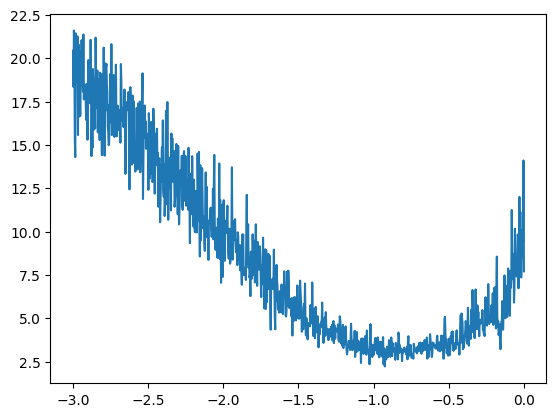

In [109]:
import matplotlib.pyplot as plt
plt.plot(lri, lossi)

In [111]:
# so best learning rate exponent is somewhere in the dip
# let's go with lre=-1, lri= 0.1
# train again with that lr

In [112]:
# Initializing the parameters
g = torch.Generator().manual_seed(2147483647)
nh = 2 # number of Neurons in the first layer # lookup layer

C = torch.randn((27, nh), generator=g, requires_grad=True) # [27, 2]
w1 = torch.randn(( nh*block_size , 100), generator=g, requires_grad=True) # [27, 6]
b1 = torch.randn((100), generator=g, requires_grad=True)
w2 = torch.randn((100, 27), generator=g, requires_grad=True)
b2 = torch.randn((27), generator=g, requires_grad=True)

params = [C, w1, b1, w2, b2]

# Making it learn
for i in range(100000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32, )) # staring num, end num, number of ints
    # we are randomly choosing 32 indexes to look into and optimize

    # Forward Pass
    emb = C[X[ix]] # First Layer: [32, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ w1 + b1) # 2nd Layer: [32, 6] @ [6, 100] = [32, 100]
    logits = h @ w2 + b2 # 3rd Layer: [32, 100] @ [100, 27] = [32, 27]
    loss = F.cross_entropy(logits, Y[ix]) # Calculating loss

    # Backward Pass
    for p in params:
        p.grad = None
    loss.backward()

    # nudging
    for p in params:
        p.data += -0.1 * p.grad

print(loss.item())

2.40836238861084


In [113]:
# checking loss for complete dataset

emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()

2.308875322341919

In [114]:
# Always better to split the data into 3 sets: train, dev/validation, test
# Train: to train the parameters (Eg: Weights & biases)
# Dev: to tune the hyperparameters (Eg: number of Neurons in hidden layers)
# Test: to test the final loss/accuracy

In [115]:
# After training on Train, evaluate the loss on dev

# if loss(train) << loss(dev)
    # it means that our model has hypothetically memorized the training data
    # that's why it's giving very low loss on train data, but high loss on dev data
    # this is called overfitting

# if loss(train) ~ loss(dev)
    # this is a case of underfitting
    # i.e. our model is too small, and we expect to make performance improvements by increasing the parameters
    # best way is to increase the number of Neurons in the hidden layer (100 -> 300)
    # or we can also increase the layers in our embedding (2 -> 10)
    # or we can change the number of characters we are feeding (context 3 -> 4, 5)
    # or we can run more training loops with decaying learning rate
    # or we can change the batch size (32 -> 64)

In [118]:
# SAMPLING

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size

    while True:
        emb = C[torch.tensor([context])] # [1, block_size, C dimension]
        h = torch.tanh(emb.view(1, -1) @ w1 + b1)
        logits = h @ w2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        if ix ==0:
            break
        out.append(ix)
    print(''.join(itos[i] for i in out))

mora
mayah
seel
ndheyah
rethrsiendrlee
azeredieliah
milie
rekeliean
nar
kayzioh
karin
shubergsairiel
kin
reneliph
thuofiu
zen
dar
yurue
ehs
kay
